In [263]:
import pandas as pd
import numpy as np
import pycountry_convert as pc
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore") 

In [264]:
data = pd.read_csv('survey_results_public.csv')
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

# 

In [266]:
columns_for_analysis = [
    'MainBranch',
    'Country',
    'Age',
    'Gender',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'Employment',
    'DevType',
    'JobSat',
    'CareerSat',
    'JobFactors',
    'ConvertedComp']

In [267]:
len(columns_for_analysis)

16

In [268]:
data_for_analysis = data[columns_for_analysis].copy()

In [269]:
data_for_analysis.shape

(88883, 16)

In [270]:
data_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Country                 88751 non-null  object 
 2   Age                     79210 non-null  float64
 3   Gender                  85406 non-null  object 
 4   Hobbyist                88883 non-null  object 
 5   Age1stCode              87634 non-null  object 
 6   YearsCode               87938 non-null  object 
 7   YearsCodePro            74331 non-null  object 
 8   LanguageWorkedWith      87569 non-null  object 
 9   LanguageDesireNextYear  84088 non-null  object 
 10  Employment              87181 non-null  object 
 11  DevType                 81335 non-null  object 
 12  JobSat                  70988 non-null  object 
 13  CareerSat               72847 non-null  object 
 14  JobFactors              79371 non-null

#### Q1. Find the average age of developers when they wrote their first line of code

Before proceeding on with this question, the first thing to do would be to convert the column required for this which is 'Age1stCode' to be converted to numeric. There are some non-numeric values as well in the column and this can be ignored by using the 'coerce' argument while converting these columns to integer type.

In [271]:
average_age_code = data_for_analysis.copy()

In [272]:
average_age_code['Age1stCode'].unique()

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

In [273]:
average_age_code['Age1stCode'] = pd.to_numeric(average_age_code['Age1stCode'], errors='coerce')

In [274]:
average_age_code.describe()

,Age,Age1stCode,ConvertedComp
count,79210.000000,87088.000000,5.582300e+04
mean,30.336699,15.456446,1.271107e+05
std,9.178390,4.993287,2.841523e+05
min,1.000000,5.000000,0.000000e+00
25%,24.000000,12.000000,2.577750e+04
50%,29.000000,15.000000,5.728700e+04
75%,35.000000,18.000000,1.000000e+05
max,99.000000,84.000000,2.000000e+06


In [275]:
#Filtering out the ones who are developers by profession and then finding the avg.age when they first started coding
average_age_code[average_age_code['MainBranch']=='I am a developer by profession']

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp
3,I am a developer by profession,United States,22.0,Man,No,16.0,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14.0,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN
6,I am a developer by profession,Ukraine,42.0,Man,No,17.0,6,4,HTML/CSS;JavaScript,HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...","Designer;Developer, front-end",Neither satisfied nor dissatisfied,Slightly satisfied,Remote work options;Opportunities for professi...,NaN
8,I am a developer by profession,New Zealand,23.0,Man,Yes,11.0,12,4,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,Employed full-time,"Database administrator;Developer, back-end;Dev...",Slightly satisfied,Slightly satisfied,Financial performance or funding status of the...,95179.0
9,I am a developer by profession,India,NaN,NaN,Yes,20.0,12,10,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Employed full-time,Data or business analyst;Data scientist or mac...,Slightly dissatisfied,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",13293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88325,I am a developer by profession,United States,26.0,Man,Yes,14.0,12,3,HTML/CSS;JavaScript;Scala;TypeScript,JavaScript;Rust;Scala;TypeScript,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",Very satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",130000.0
88326,I am a developer by profession,Finland,34.0,Man,Yes,16.0,17,7,Bash/Shell/PowerShell;C++;Python,C++,Employed full-time,"Developer, desktop or enterprise applications;...",Neither satisfied nor dissatisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",82488.0
88328,I am a developer by profession,Austria,37.0,Man,Yes,17.0,18,9,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Employed full-time,"Developer, full-stack;Engineer, site reliability",Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,Office environment or company culture;Diversit...,68745.0
88329,I am a developer by profession,Netherlands,NaN,Man,Yes,15.0,10,8,C#;HTML/CSS;Java;JavaScript;PHP;Python,C#;Java;JavaScript;PHP,Employed full-time,Academic researcher;Database administrator;Dev...,Very dissatisfied,Slightly dissatisfied,Office environment or company culture;Remote w...,588012.0


In [276]:
print("The average age of Developers when they first started coding is : {} years".format(
               np.round(average_age_code['Age1stCode'].mean(), 0)))

The average age of Developers when they first started coding is : 15.0 years


#### Q2. Deduce the percentage of developers who knew python in each country.

In [277]:
developers_python_country = data_for_analysis.copy()

In [278]:
developers_python_country['LanguageWorkedWith'] = developers_python_country['LanguageWorkedWith'].fillna('Missing')

In [279]:
developers_python_country = developers_python_country[developers_python_country['LanguageWorkedWith'].str.contains('Python')]
developers_python_country.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,19.0,Man,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN
7,I code primarily as a hobby,India,24.0,Man,Yes,16,8,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,"Not employed, but looking for work","Developer, back-end;Engineer, site reliability",NaN,NaN,NaN,NaN


In [280]:
developers_python_country.shape

(36443, 16)

In [281]:
percent_devs_python = developers_python_country[developers_python_country['MainBranch']=='I am a developer by profession']

In [282]:
percent_devs_python.shape

(24285, 16)

In [283]:
print("Percentage of Developers who know Python in each country:")

np.round(percent_devs_python['Country'].value_counts() / len(percent_devs_python)*100, 2).head(25)

Percentage of Developers who know Python in each country:


United States         29.37
India                  8.02
United Kingdom         6.58
Germany                6.37
Canada                 4.29
France                 2.84
Brazil                 2.29
Poland                 2.20
Australia              2.16
Russian Federation     2.04
Netherlands            2.01
Spain                  1.86
Italy                  1.60
Israel                 1.44
Sweden                 1.39
Switzerland            1.28
Turkey                 0.89
Austria                0.83
Iran                   0.82
Finland                0.80
Czech Republic         0.75
China                  0.73
Mexico                 0.73
Belgium                0.70
Romania                0.70
Name: Country, dtype: float64

#### Q3. Generate the report for the average salary of developers based on the continent.

In [284]:
country_continent = data_for_analysis.copy()

In [285]:
country_continent['Country'] = country_continent['Country'].fillna('Missing')

In [286]:
filtered_countries = country_continent[(country_continent['Country'] != 'Other Country (Not Listed Above)') & 
                                      (country_continent['Country'] != 'Missing') & (country_continent['Country'] != 'Timor-Leste')]

In [287]:
filtered_countries['Country'].unique()

array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia',
       'Hong Kong (S.A.R.)', 'United Arab Emirates', 'Portugal',
       'Nigeria', 'Norway', 'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico',
       'Dominican Republic', 'Guatemala', 'Chile', 'Ecuador', 'Ghana',
       'Uganda', 'Cambodia', 'Mauritius', 'Nepal', 'Singapore'

In [288]:
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Hong Kong (S.A.R.)', value='Hong Kong')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Venezuela, Bolivarian Republic of...', 
                                                                      value='Venezuela')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='The former Yugoslav Republic of Macedonia', 
                                                                      value='North Macedonia')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Democratic Republic of the Congo', 
                                                                      value='Congo')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='United Republic of Tanzania', 
                                                                      value='Tanzania')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Congo, Republic of the...', 
                                                                      value='Congo')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Libyan Arab Jamahiriya', 
                                                                      value='Libya')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace='Republic of Korea', 
                                                                      value='South Korea')
filtered_countries['Country'] = filtered_countries['Country'].replace(to_replace="Democratic People's Republic of Korea", 
                                                                      value='North Korea')

In [289]:
filtered_countries['Country'].unique()

array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia', 'Hong Kong',
       'United Arab Emirates', 'Portugal', 'Nigeria', 'Norway',
       'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico', 'Dominican Republic',
       'Guatemala', 'Chile', 'Ecuador', 'Ghana', 'Uganda', 'Cambodia',
       'Mauritius', 'Nepal', 'Singapore', 'Sierra

In [290]:
filtered_countries.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,19.0,Man,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN
2,"I am not primarily a developer, but I write co...",Thailand,28.0,Man,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN


In [291]:
filtered_countries['Country'] = filtered_countries['Country'].astype(str)

In [292]:
def convert(row):
    country_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format="default")
    conti_code = pc.country_alpha2_to_continent_code(country_code)
    country_continent_name = pc.convert_continent_code_to_continent_name(conti_code)
    return country_continent_name

In [293]:
filtered_countries['Continent'] = filtered_countries.apply(convert, axis=1)

In [294]:
filtered_countries.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp,Continent
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Europe
1,I am a student who is learning to code,Bosnia and Herzegovina,19.0,Man,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN,Europe
2,"I am not primarily a developer, but I write co...",Thailand,28.0,Man,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0,Asia
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0,North America
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Europe


In [295]:
filtered_countries['Gender'].value_counts()

Man                                                            77817
Woman                                                           6332
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       68
Name: Gender, dtype: int64

In [296]:
filtered_countries['Gender'] = filtered_countries['Gender'].replace(to_replace='Non-binary, genderqueer, or gender non-conforming', 
                                                                    value='Others')
filtered_countries['Gender'] = filtered_countries['Gender'].replace(to_replace='Man;Non-binary, genderqueer, or gender non-conforming', 
                                                                      value='Others')
filtered_countries['Gender'] = filtered_countries['Gender'].replace(to_replace='Woman;Non-binary, genderqueer, or gender non-conforming', 
                                                                      value='Others')
filtered_countries['Gender'] = filtered_countries['Gender'].replace(to_replace='Woman;Man', 
                                                                      value='Others')
filtered_countries['Gender'] = filtered_countries['Gender'].replace(to_replace='Woman;Man;Non-binary, genderqueer, or gender non-conforming', 
                                                                      value='Others')

In [297]:
avg_sal_continent = filtered_countries[filtered_countries['MainBranch']=='I am a developer by profession']
avg_sal_continent.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp,Continent
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0,North America
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Europe
6,I am a developer by profession,Ukraine,42.0,Man,No,17,6,4,HTML/CSS;JavaScript,HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...","Designer;Developer, front-end",Neither satisfied nor dissatisfied,Slightly satisfied,Remote work options;Opportunities for professi...,NaN,Europe
8,I am a developer by profession,New Zealand,23.0,Man,Yes,11,12,4,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,Employed full-time,"Database administrator;Developer, back-end;Dev...",Slightly satisfied,Slightly satisfied,Financial performance or funding status of the...,95179.0,Oceania
9,I am a developer by profession,India,NaN,NaN,Yes,20,12,10,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Employed full-time,Data or business analyst;Data scientist or mac...,Slightly dissatisfied,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",13293.0,Asia


In [298]:
avg_sal_continent_final = avg_sal_continent.groupby(['Continent'])['ConvertedComp'].mean().sort_values(ascending=False)
avg_sal_continent_final

Continent
North America    227745.883865
Oceania          167614.534447
Europe            96913.697864
Asia              37095.137756
Africa            34767.603299
South America     32967.589357
Name: ConvertedComp, dtype: float64

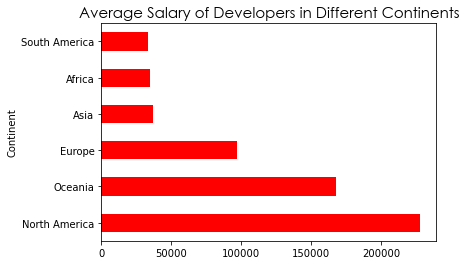

In [299]:
avg_sal_continent_final.plot(kind='barh', color='Red')
plt.title('Average Salary of Developers in Different Continents', size=15, family='Century Gothic');

In [309]:
filtered_countries.to_csv('filtered_data_continents_gender.csv')

#### Q4. Based on this survey, what will be the most desired programming language for the year  2020? 

In [300]:
language_next_year = data_for_analysis.copy()

In [301]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate through every column with non-null value
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Seperate them by ';'
        for option in value.split(';'):
            # Add every language as column
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the column as True if present
            result_df.at[idx, option] = True
    return result_df[options]

In [302]:
language_next_year = split_multicolumn(language_next_year['LanguageDesireNextYear'])

In [303]:
language_next_year_percent = language_next_year.mean().sort_values(ascending=False)*100
language_next_year_percent

JavaScript               50.334710
Python                   45.009732
HTML/CSS                 41.228356
SQL                      37.764252
TypeScript               26.686768
Java                     26.448252
C#                       25.256798
Bash/Shell/PowerShell    23.967463
Go                       19.193772
C++                      18.964256
Kotlin                   14.919613
PHP                      14.442582
C                        12.536706
Rust                     11.809907
Swift                     9.900656
WebAssembly               9.495629
Other(s):                 8.901590
Ruby                      8.157915
R                         7.576252
Scala                     6.257665
Assembly                  5.241722
Dart                      4.982955
Elixir                    4.261782
F#                        3.961387
Objective-C               3.207588
Clojure                   3.096205
Erlang                    2.389658
VBA                       1.846247
dtype: float64

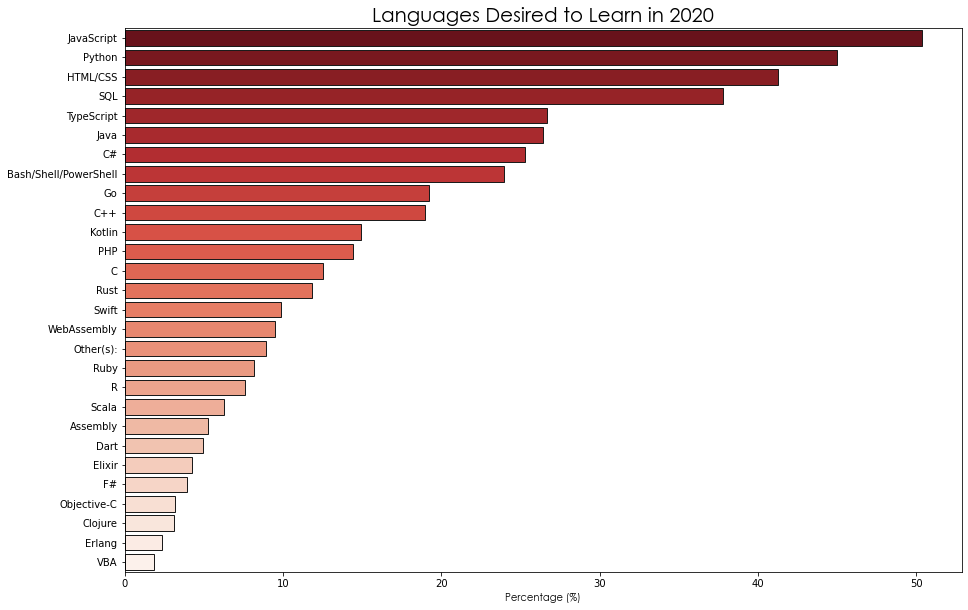

In [305]:
plt.figure(figsize=(15,10))
sns.barplot(x=language_next_year_percent, y=language_next_year_percent.index, palette='Reds_r', ec='#1b1b1b')
plt.xlabel('Percentage (%)', family='Century Gothic', size=10)
plt.title("Languages Desired to Learn in 2020", family='Century Gothic', size=20);

#### Q5. Generate the report for the people who code as a hobby based on their gender and continent.

In [310]:
code_hobby = pd.read_csv('filtered_data_continents_gender.csv')
code_hobby = code_hobby.drop('Unnamed: 0', axis=1)
code_hobby.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp,Continent
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Europe
1,I am a student who is learning to code,Bosnia and Herzegovina,19.0,Man,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN,Europe
2,"I am not primarily a developer, but I write co...",Thailand,28.0,Man,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0,Asia
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0,North America
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Europe


In [311]:
code_hobby = code_hobby[code_hobby['Hobbyist']=="Yes"]
code_hobby.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp,Continent
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Europe
2,"I am not primarily a developer, but I write co...",Thailand,28.0,Man,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0,Asia
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Europe
5,"I am not primarily a developer, but I write co...",Canada,28.0,Man,Yes,15,13,3,Java;R;SQL,Python;Scala;SQL,Employed full-time,Data or business analyst;Data scientist or mac...,Slightly satisfied,Very satisfied,Financial performance or funding status of the...,366420.0,North America
7,I code primarily as a hobby,India,24.0,Man,Yes,16,8,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,"Not employed, but looking for work","Developer, back-end;Engineer, site reliability",NaN,NaN,NaN,NaN,Asia


In [312]:
code_hobby['Gender'].value_counts()

Man       63542
Woman      4020
Others      925
Name: Gender, dtype: int64

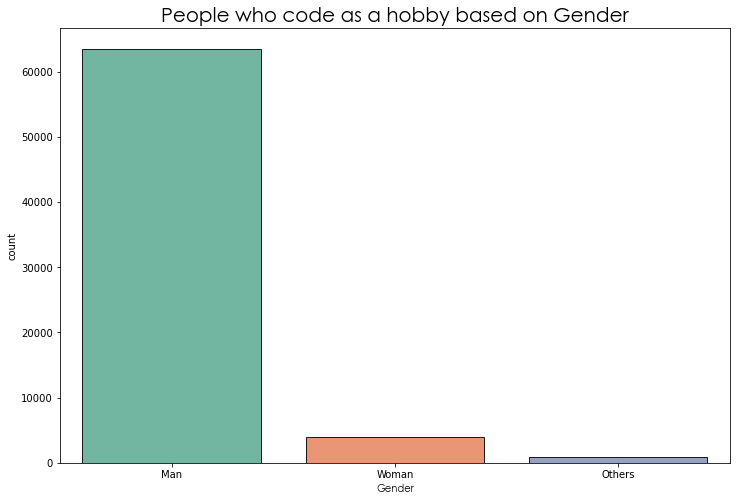

In [313]:
plt.figure(figsize=(12,8))
sns.countplot(x=code_hobby['Gender'], palette='Set2', ec='#1b1b1b')
plt.xlabel('Gender', family='Century Gothic', size=10)
plt.title("People who code as a hobby based on Gender", family='Century Gothic', size=20);

In [314]:
code_hobby['Continent'].value_counts()

Europe           29403
North America    20410
Asia             14501
South America     2667
Africa            2163
Oceania           2013
Name: Continent, dtype: int64

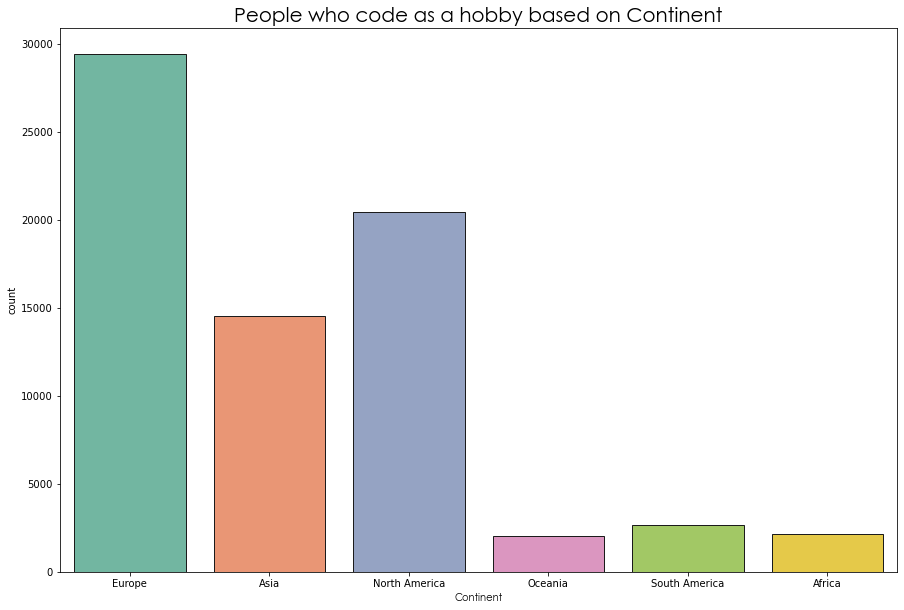

In [315]:
plt.figure(figsize=(15,10))
sns.countplot(x=code_hobby['Continent'], palette='Set2', ec='#1b1b1b')
plt.xlabel('Continent', family='Century Gothic', size=10)
plt.title("People who code as a hobby based on Continent", family='Century Gothic', size=20);

#### Q6. Generate the report for job and career satisfaction of developers based on their gender and continent.

In [316]:
data_sat = pd.read_csv('filtered_data_continents_gender.csv')
data_sat = data_sat.drop('Unnamed: 0', axis=1)
data_sat.head()

,MainBranch,Country,Age,Gender,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,JobSat,CareerSat,JobFactors,ConvertedComp,Continent
0,I am a student who is learning to code,United Kingdom,14.0,Man,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Europe
1,I am a student who is learning to code,Bosnia and Herzegovina,19.0,Man,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN,Europe
2,"I am not primarily a developer, but I write co...",Thailand,28.0,Man,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0,Asia
3,I am a developer by profession,United States,22.0,Man,No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",Slightly satisfied,Very satisfied,"Languages, frameworks, and other technologies ...",61000.0,North America
4,I am a developer by profession,Ukraine,30.0,Man,Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Europe


**JOB SATISFACTION**

In [331]:
job_sat = data_sat.copy()

In [332]:
job_sat = job_sat[job_sat['MainBranch']=='I am a developer by profession']
job_sat['JobSat'] = job_sat['JobSat'].fillna('Missing')
job_sat['JobSat'].value_counts()

Slightly satisfied                    21845
Very satisfied                        20241
Slightly dissatisfied                  9541
Neither satisfied nor dissatisfied     7808
Very dissatisfied                      4335
Missing                                1821
Name: JobSat, dtype: int64

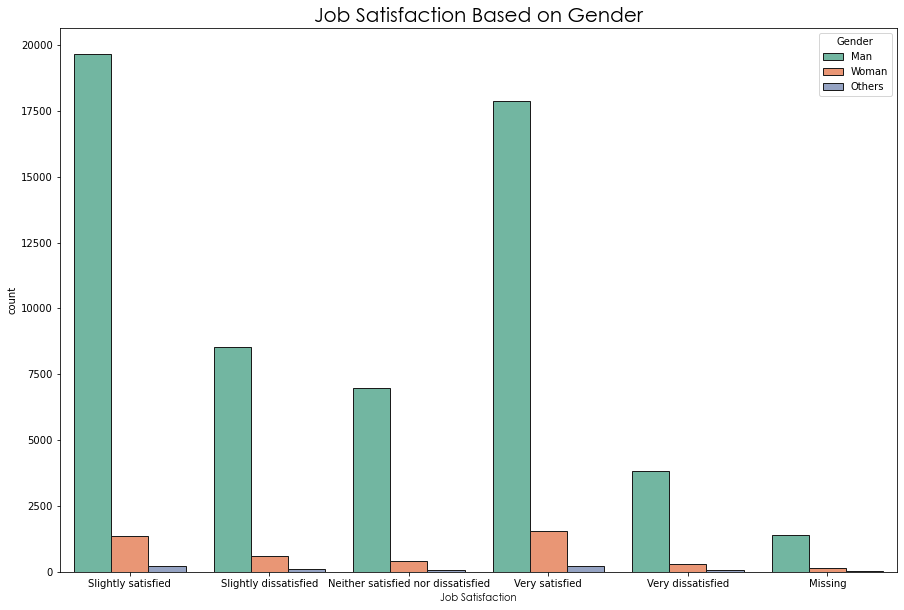

In [333]:
plt.figure(figsize=(15,10))
sns.countplot(x=job_sat['JobSat'], palette='Set2', hue=job_sat['Gender'], ec='#1b1b1b')
plt.xlabel('Job Satisfaction', family='Century Gothic', size=10)
plt.title("Job Satisfaction Based on Gender", family='Century Gothic', size=20);

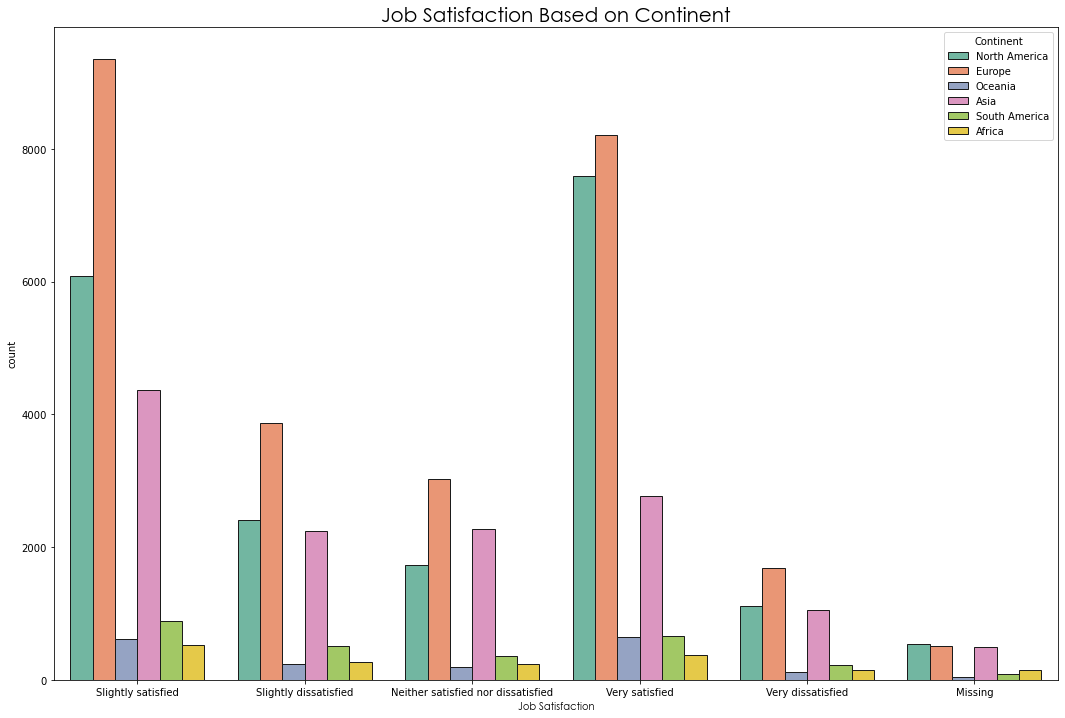

In [334]:
plt.figure(figsize=(18,12))
sns.countplot(x=job_sat['JobSat'], palette='Set2', hue=job_sat['Continent'], ec='#1b1b1b')
plt.xlabel('Job Satisfaction', family='Century Gothic', size=10)
plt.title("Job Satisfaction Based on Continent", family='Century Gothic', size=20);

**CAREER SATISFACTION**

In [329]:
career_sat = data_sat.copy()

In [335]:
career_sat = career_sat[career_sat['MainBranch']=='I am a developer by profession']
career_sat['CareerSat'] = career_sat['CareerSat'].fillna('Missing')
career_sat['CareerSat'].value_counts()

Very satisfied                        26618
Slightly satisfied                    22455
Slightly dissatisfied                  6653
Neither satisfied nor dissatisfied     6243
Very dissatisfied                      3353
Missing                                 269
Name: CareerSat, dtype: int64

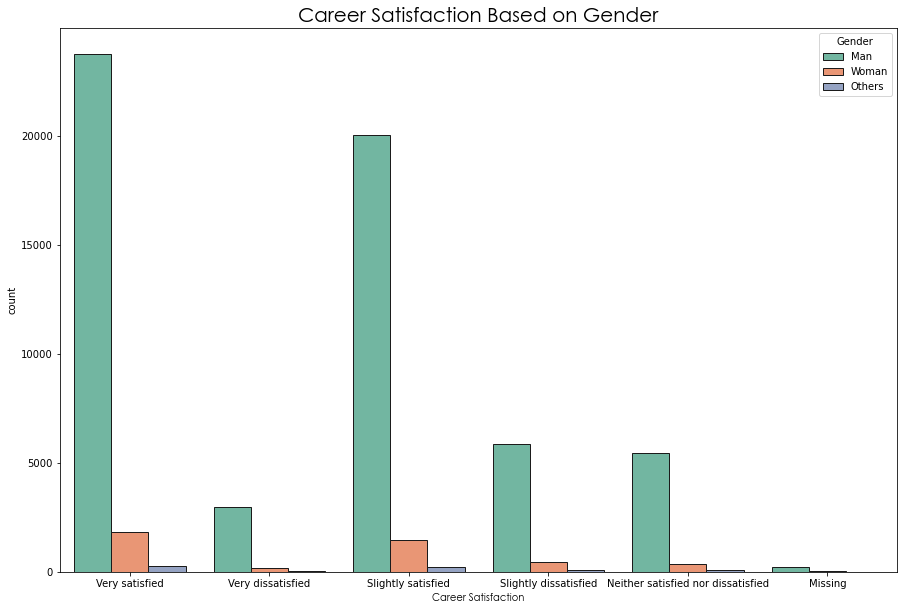

In [337]:
plt.figure(figsize=(15,10))
sns.countplot(x=career_sat['CareerSat'], palette='Set2', hue=career_sat['Gender'], ec='#1b1b1b')
plt.xlabel('Career Satisfaction', family='Century Gothic', size=10)
plt.title("Career Satisfaction Based on Gender", family='Century Gothic', size=20);

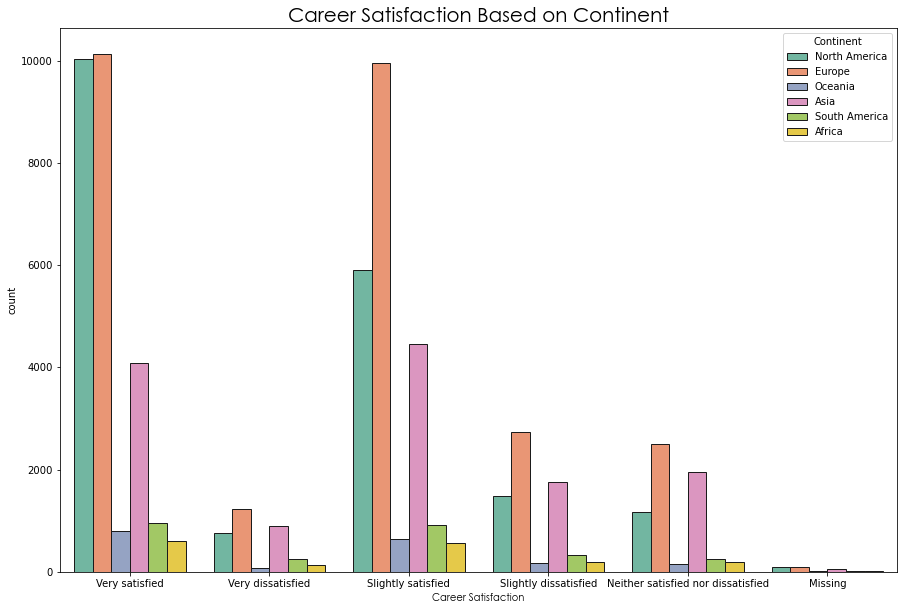

In [338]:
plt.figure(figsize=(15,10))
sns.countplot(x=career_sat['CareerSat'], palette='Set2', hue=career_sat['Continent'], ec='#1b1b1b')
plt.xlabel('Career Satisfaction', family='Century Gothic', size=10)
plt.title("Career Satisfaction Based on Continent", family='Century Gothic', size=20);